## Fuzzy-logic Tipping Control

1) Bangun struktur membership function manual untuk 'quality' dan 'service'
2) Definisikan kelas untuk masing-masing parameter!
3) buatlah 'rules' baru!

C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


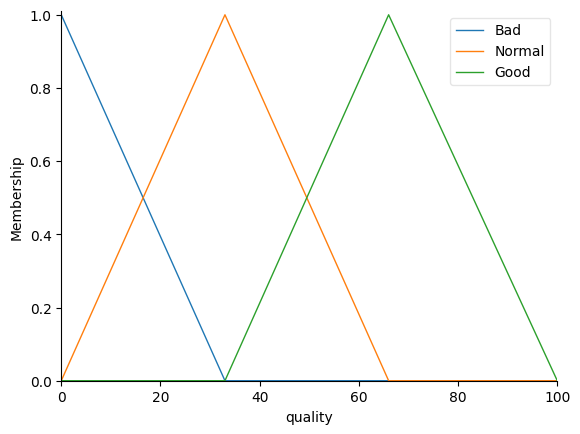

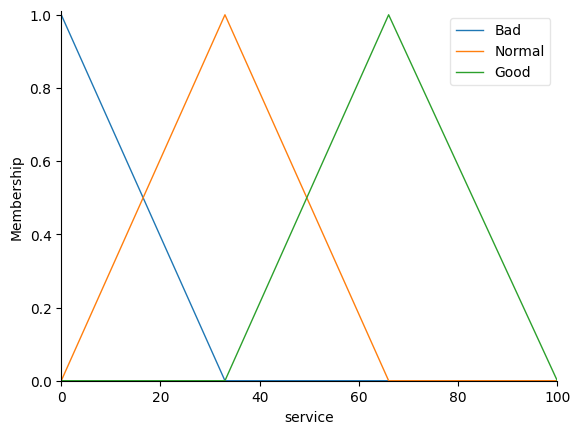

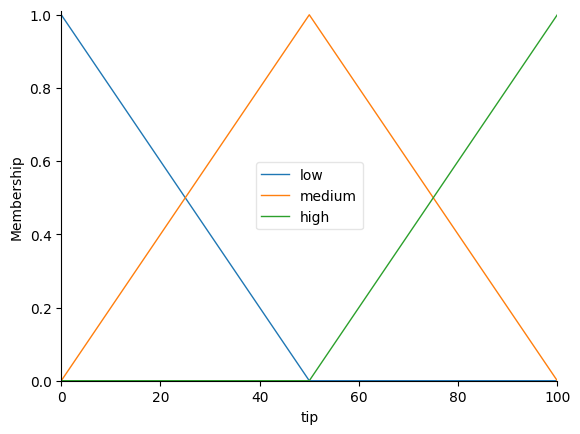

In [1]:
#1) Bangun struktur membership function manual untuk 'quality' dan 'service'
#2) Definisikan kelas untuk masing-masing parameter!
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables
# and membership functions
quality = ctrl.Antecedent(np.arange(0, 101, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 101, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 101, 1), 'tip')

# Manually define membership functions for 'quality'
quality['Bad'] = fuzz.trimf(quality.universe, [0, 0, 33])
quality['Normal'] = fuzz.trimf(quality.universe, [0, 33, 66])
quality['Good'] = fuzz.trimf(quality.universe, [33, 66, 100])

# Manually define membership functions for 'service'
service['Bad'] = fuzz.trimf(service.universe, [0, 0, 33])
service['Normal'] = fuzz.trimf(service.universe, [0, 33, 66])
service['Good'] = fuzz.trimf(service.universe, [33, 66, 100])

# Auto-membership function population is possible with
# .automf(3, 5, or 7)
# quality.automf(3)
# service.automf(3)

# Custom membership functions for 'tip'
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 50])
tip['medium'] = fuzz.trimf(tip.universe, [0, 50, 100])
tip['high'] = fuzz.trimf(tip.universe, [50, 100, 100])

# Visualize the membership functions
quality.view()
service.view()
tip.view()
plt.show()

In [2]:
#3) buatlah 'rules' baru!
Rules = [
    ctrl.Rule(quality['Bad'] & service['Bad'], tip['low']),
    ctrl.Rule(quality['Bad'] & service['Normal'], tip['low']),
    ctrl.Rule(quality['Bad'] & service['Good'], tip['medium']),
    ctrl.Rule(quality['Normal'] & service['Bad'], tip['low']),
    ctrl.Rule(quality['Normal'] & service['Normal'], tip['medium']),
    ctrl.Rule(quality['Normal'] & service['Good'], tip['high']),
    ctrl.Rule(quality['Good'] & service['Bad'], tip['medium']),
    ctrl.Rule(quality['Good'] & service['Normal'], tip['high']),
    ctrl.Rule(quality['Good'] & service['Good'], tip['high'])
]


In [3]:
tipping_ctrl = ctrl.ControlSystem(Rules)

In [4]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [5]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 90
tipping.input['service'] = 90

# Crunch the numbers
tipping.compute()

78.46517917511827


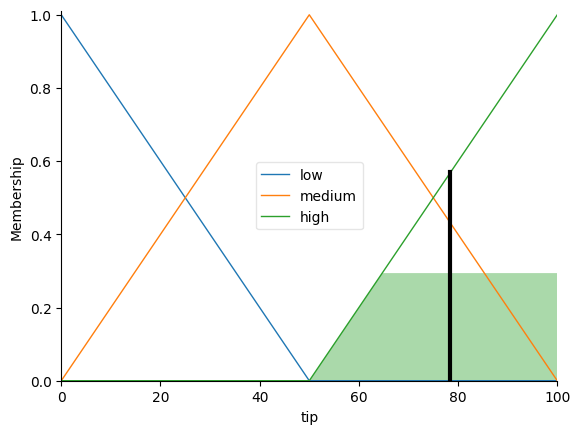

In [6]:
print(tipping.output['tip'])
tip.view(sim=tipping)


37.68634176158959


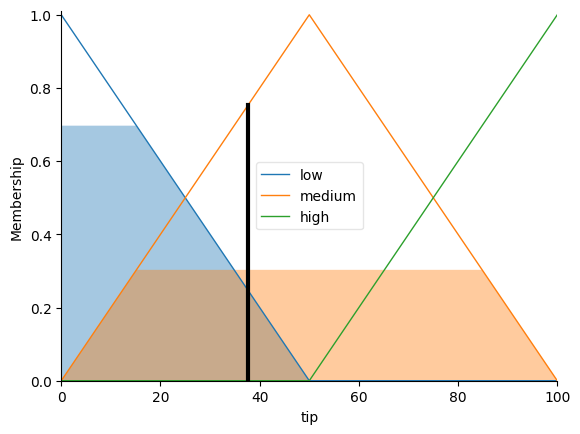

In [7]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 10
tipping.input['service'] = 10

# Crunch the numbers
tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)

51.07128256769043


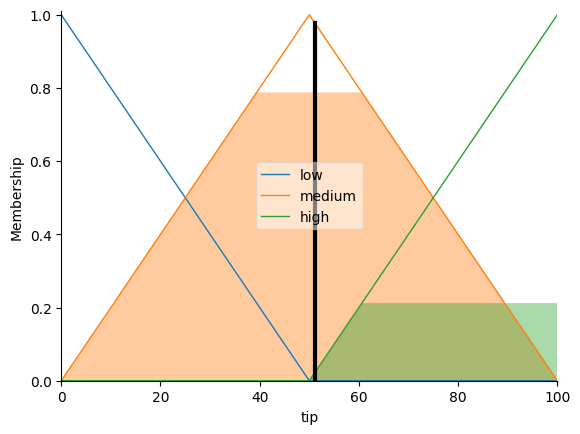

In [8]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 40
tipping.input['service'] = 40

# Crunch the numbers
tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)